
# <center>Детектирование букв.</center>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import style
style.use('seaborn')

In [2]:
train = pd.read_csv("train.csv", header=None)

In [3]:
train = np.asarray(train)
first_pic = train[90]
pic_label, pic = first_pic[0], first_pic[1:]
print(pic_label)

6


In [607]:
train[1]

array([ 25,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   8,
        32,  32,   9,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        13, 106, 202, 203, 139,  82,  34,   9,   4,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   6,  87, 206, 246, 250, 233, 204, 140, 114,  5

In [4]:
train.shape

(65000, 785)

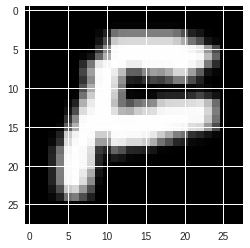

In [5]:
plt.imshow(pic.reshape((28, 28)).T, cmap='gray')
plt.show()

Считав и посмотрев на данные, составим тестовую и обучаюшую выборки, а также переведем данные в размерность (28,28)

In [57]:
train_images = np.zeros((len(train), 28, 28), dtype=float)
train_labels = np.zeros(len(train), dtype=int)
for i in range(len(train)):
    train_labels[i] = train[i][0]
    train_images[i] = train[i][1:].reshape((28,28)).T

In [62]:
test = pd.read_csv('test.csv', header=None)

In [63]:
test = np.asarray(test)

In [64]:
test_images = np.zeros((len(test), 28, 28), dtype=float)
test_labels = np.zeros(len(test), dtype=int)
for i in range(len(test)):
    test_labels[i] = test[i][0]
    test_images[i] = test[i][1:].reshape((28,28)).T

In [94]:
print('Train data size:', train_images.shape,
      '\nTest data size:', test_images.shape,
      '\n\nTrain label size:', train_labels.shape,
      '\nTest label size:', test_labels.shape)

Train data size: (65000, 28, 28) 
Test data size: (13000, 28, 28) 

Train label size: (65000,) 
Test label size: (13000,)


In [98]:
np.unique(train_labels, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26]),
 array([2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500,
        2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500,
        2500, 2500, 2500, 2500]))

In [99]:
np.unique(test_labels, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26]),
 array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500]))

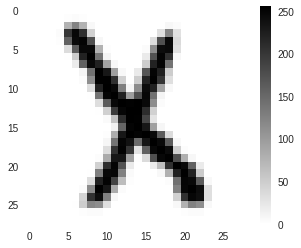

In [79]:
plt.figure()
plt.imshow(train_images[23], cmap='gray_r')
plt.colorbar()
plt.grid(False)
plt.show()

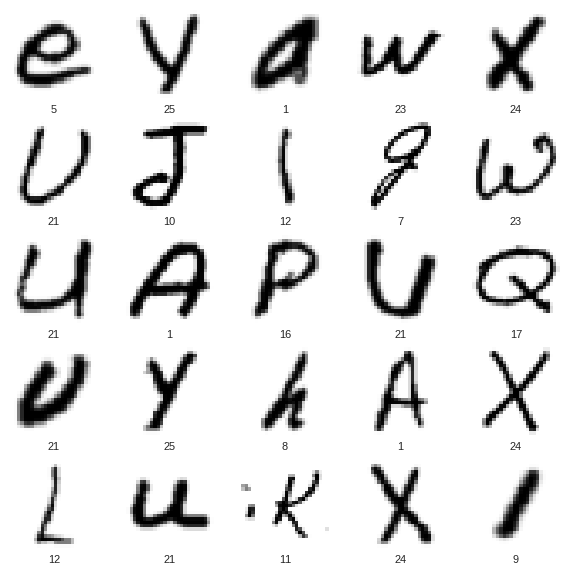

In [80]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
    plt.grid(False)

plt.show()

Переведем значения в шкалу от 0 до 1.

In [81]:
train_images = train_images / 255.0
test_images = test_images / 255.0

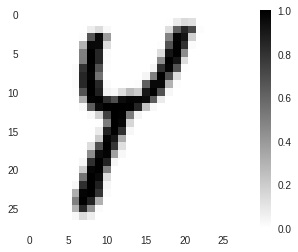

In [87]:
plt.figure()
plt.imshow(train_images[82], cmap='gray_r')
plt.colorbar()
plt.grid(False)
plt.show()

### Задание 1

Построим для начала однослойную сеть

Все параметры для нейросетей подбираются вручную, так как на кросс валидации параметры подбрирались очень долго и оказались неоптимальными. Так что подбор идет по принципу: подгон под точность, недопустив переобучения

In [ ]:
linear_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(27, activation=tf.nn.softmax) 
])

In [121]:
linear_model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01), 
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [122]:
linear_model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
65000/65000 [==============================] - 6s 86us/step - loss: 1.8897 - acc: 0.5167
Epoch 2/10
65000/65000 [==============================] - 5s 77us/step - loss: 1.3562 - acc: 0.6263
Epoch 3/10
65000/65000 [==============================] - 5s 71us/step - loss: 1.2501 - acc: 0.6508
Epoch 4/10
65000/65000 [==============================] - 5s 73us/step - loss: 1.1963 - acc: 0.6657
Epoch 5/10
65000/65000 [==============================] - 5s 71us/step - loss: 1.1624 - acc: 0.6740
Epoch 6/10
65000/65000 [==============================] - 4s 69us/step - loss: 1.1385 - acc: 0.6809
Epoch 7/10
65000/65000 [==============================] - 5s 70us/step - loss: 1.1206 - acc: 0.6863
Epoch 8/10
65000/65000 [==============================] - 5s 70us/step - loss: 1.1064 - acc: 0.6906
Epoch 9/10
65000/65000 [==============================] - 5s 80us/step - loss: 1.0952 - acc: 0.6934
Epoch 10/10
65000/65000 [==============================] - 5s 80us/step - loss: 1.0856 - acc: 0.6969

In [123]:
test_loss, test_acc = linear_model.evaluate(test_images, test_labels)

13000/13000 [==============================] - 1s 57us/step


In [124]:
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

Test accuracy: 0.6876153846153846 
Test loss: 1.107269125865056


У каждого пикселя есть свой вес, веса разные для каждого класса.
Мы можем свернуть вектор весов в картинку  28×28  и провизуализировать:

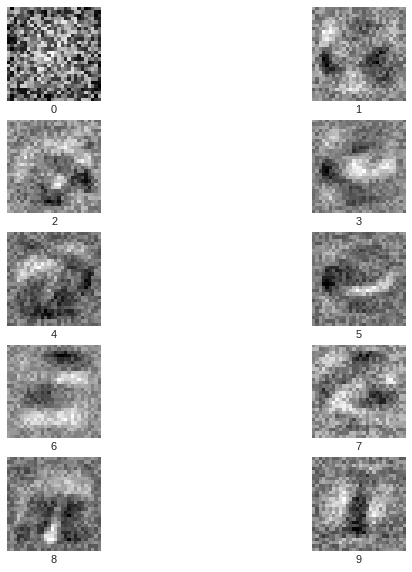

In [126]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(linear_model.get_layer(index=1).get_weights()[0][:, i].reshape((28, 28)) * -1, cmap='gray')
    plt.xlabel(i)
    plt.grid(False)

plt.show()

Как мы видим, сильно буквы не выделяются, если только некоторые видно, что соотвествуют своему классу

In [127]:
from sklearn import metrics
from plot_cm import plot_confusion_matrix

In [ ]:
style.use('default')
plot_confusion_matrix(cm=metrics.confusion_matrix(test_labels, linear_model.predict_classes(test_images)),
                      target_names=np.arange(0, 10),
                      normalize=True)

Проверим нашу сеть на 100 эпохах

In [138]:
%%time 

linear_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), 
    keras.layers.Dense(27, activation=tf.nn.softmax) 
])

linear_model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01), 
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

linear_model.fit(train_images, train_labels, epochs=100, verbose=0)

CPU times: user 9min 56s, sys: 5min 37s, total: 15min 34s
Wall time: 7min 16s


In [139]:
test_loss, test_acc = linear_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

13000/13000 [==============================] - 1s 69us/step
Test accuracy: 0.7096153846153846 
Test loss: 1.031039940907405


Точность очень низкая! никуда не годится

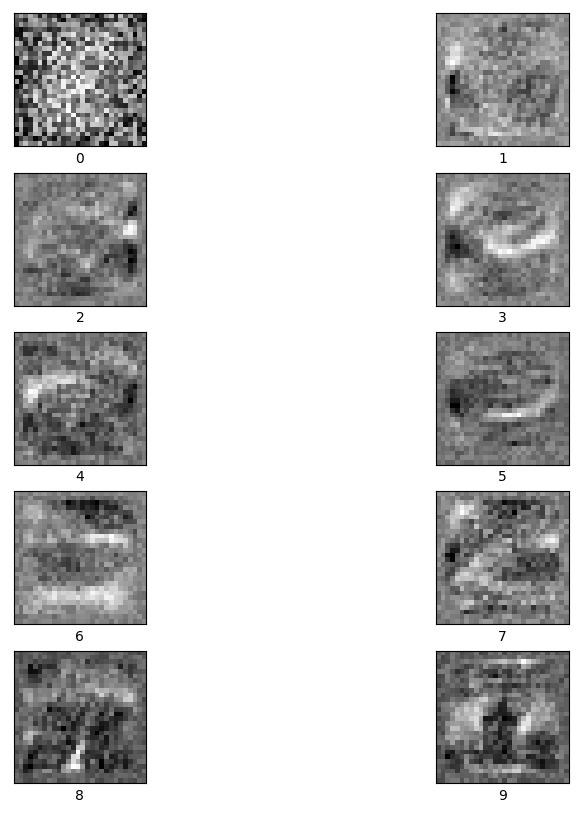

In [140]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(linear_model.get_layer(index=1).get_weights()[0][:, i].reshape((28, 28)), cmap='gray_r')
    plt.xlabel(i)
    plt.grid(False)

plt.show()

Здесь чуточку лучше видно соответсвтвие классам,но не так как хотелось бы

Сделаем один скрытый слой из 100 нейронов

In [145]:
linear_model = keras.Sequential()

linear_model.add(keras.layers.Flatten(input_shape=(28, 28)))
linear_model.add(keras.layers.Dense(100))
linear_model.add(keras.layers.Activation('relu')) 
linear_model.add(keras.layers.Dense(27, activation=tf.nn.softmax))

In [146]:
linear_model.compile(optimizer=keras.optimizers.SGD(lr=0.01), 
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [148]:
linear_model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
65000/65000 [==============================] - 7s 105us/step - loss: 0.5873 - acc: 0.8304
Epoch 2/10
65000/65000 [==============================] - 9s 133us/step - loss: 0.5642 - acc: 0.8374
Epoch 3/10
65000/65000 [==============================] - 8s 125us/step - loss: 0.5441 - acc: 0.8419
Epoch 4/10
65000/65000 [==============================] - 7s 115us/step - loss: 0.5261 - acc: 0.8465
Epoch 5/10
65000/65000 [==============================] - 8s 130us/step - loss: 0.5102 - acc: 0.8501
Epoch 6/10
65000/65000 [==============================] - 8s 118us/step - loss: 0.4954 - acc: 0.8552
Epoch 7/10
65000/65000 [==============================] - 7s 115us/step - loss: 0.4820 - acc: 0.8597
Epoch 8/10
65000/65000 [==============================] - 7s 108us/step - loss: 0.4698 - acc: 0.8626
Epoch 9/10
65000/65000 [==============================] - 6s 100us/step - loss: 0.4590 - acc: 0.8645
Epoch 10/10
65000/65000 [==============================] - 6s 86us/step - loss: 0.4485 - ac

In [149]:
test_loss, test_acc = linear_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

13000/13000 [==============================] - 1s 90us/step
Test accuracy: 0.8508461538461538 
Test loss: 0.49731420560983514


Получили довольно неплохую точность, порог пройден, но этого мало и попробуем выжать из нейронок побольше

In [150]:
len(linear_model.layers)

4

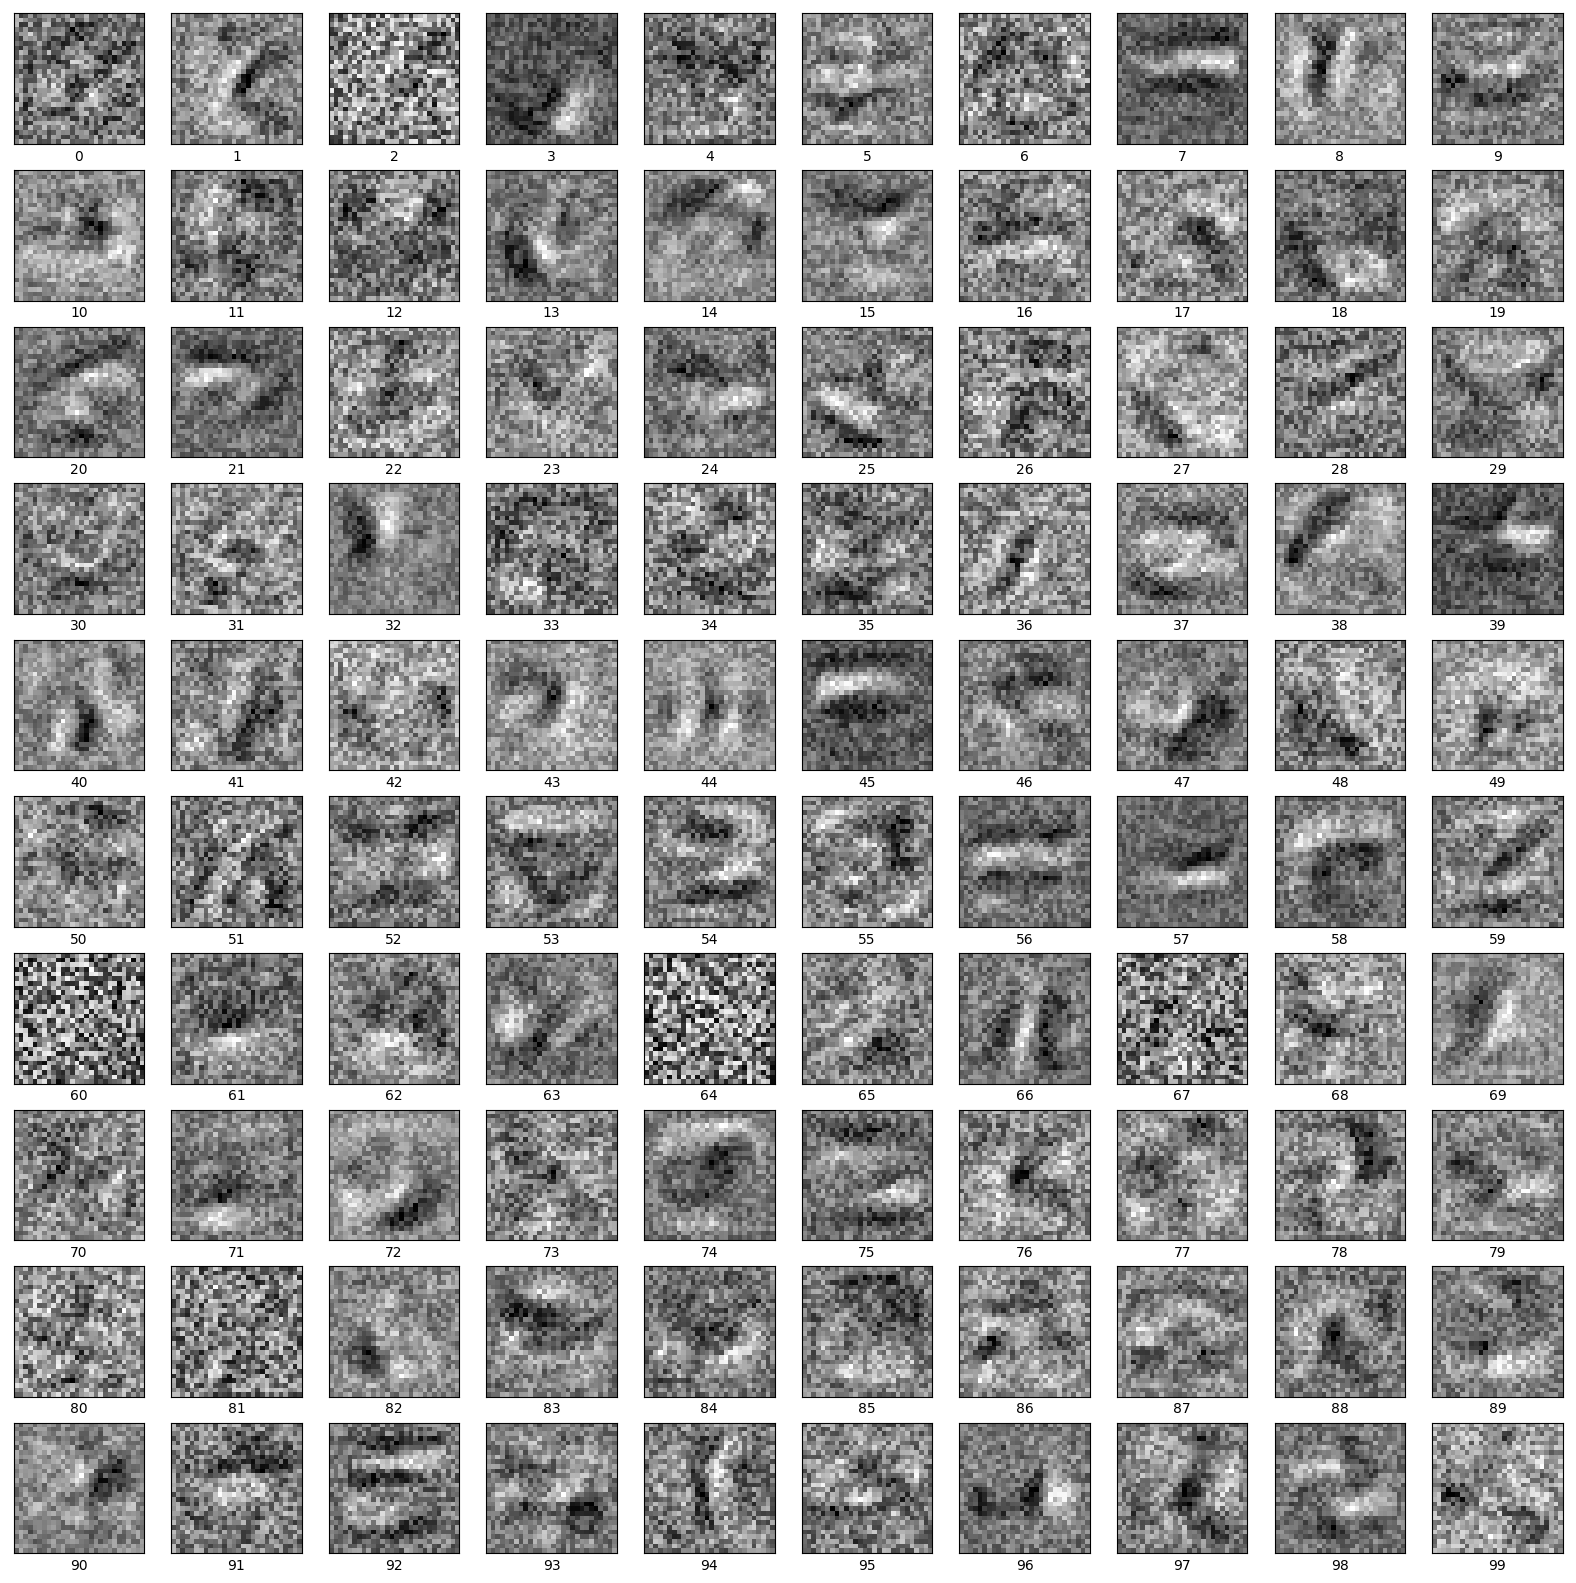

In [152]:
plt.figure(figsize=(20, 20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(linear_model.get_layer(index=1).get_weights()[0][:, i].reshape((28, 28)), cmap='gray_r')
    plt.xlabel(i)
    plt.grid(False)

plt.show()

Добавим еще пару скрытых слоев

In [210]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

In [342]:
linear_model = keras.Sequential([ 
keras.layers.Flatten(input_shape=(28, 28)), 
keras.layers.Dense(500, activation='relu'), #скрытый слой 
keras.layers.Dense(300, activation='relu'),
keras.layers.Dense(100, activation='sigmoid'),
keras.layers.Dense(27, activation=tf.nn.softmax) 
]) 
linear_model.compile(optimizer=tf.train.AdamOptimizer(),
                       loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [343]:
linear_model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
65000/65000 [==============================] - 27s 417us/step - loss: 0.7529 - acc: 0.7826
Epoch 2/10
65000/65000 [==============================] - 23s 360us/step - loss: 0.3501 - acc: 0.8880
Epoch 3/10
65000/65000 [==============================] - 25s 386us/step - loss: 0.2669 - acc: 0.9104
Epoch 4/10
65000/65000 [==============================] - 25s 386us/step - loss: 0.2210 - acc: 0.9241
Epoch 5/10
65000/65000 [==============================] - 25s 384us/step - loss: 0.1893 - acc: 0.9338
Epoch 6/10
65000/65000 [==============================] - 25s 386us/step - loss: 0.1632 - acc: 0.9404
Epoch 7/10
65000/65000 [==============================] - 25s 390us/step - loss: 0.1465 - acc: 0.9455
Epoch 8/10
65000/65000 [==============================] - 32s 491us/step - loss: 0.1310 - acc: 0.9514
Epoch 9/10
65000/65000 [==============================] - 27s 409us/step - loss: 0.1212 - acc: 0.9537
Epoch 10/10
65000/65000 [==============================] - 26s 407us/step - loss: 

In [344]:
test_loss, test_acc = linear_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

13000/13000 [==============================] - 5s 347us/step
Test accuracy: 0.9064615384615384 
Test loss: 0.3275822594807698


Точность стала лучше. Теперь попробуем избавиться от одного скрытого слоя

In [364]:
linear_model1 = keras.Sequential([ 
keras.layers.Flatten(input_shape=(28, 28)), 
# keras.layers.Dense(500, activation='relu'), #скрытый слой 
keras.layers.Dense(300, activation='relu'),
keras.layers.Dense(100, activation='sigmoid'),
keras.layers.Dense(27, activation=tf.nn.softmax) 
]) 
linear_model1.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.001),
                       loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [365]:
linear_model1.fit(train_images, train_labels, epochs=15)

Epoch 1/15
65000/65000 [==============================] - 22s 336us/step - loss: 0.9049 - acc: 0.7493
Epoch 2/15
65000/65000 [==============================] - 16s 251us/step - loss: 0.4195 - acc: 0.8717
Epoch 3/15
65000/65000 [==============================] - 18s 274us/step - loss: 0.3194 - acc: 0.8984
Epoch 4/15
65000/65000 [==============================] - 17s 265us/step - loss: 0.2672 - acc: 0.9131
Epoch 5/15
65000/65000 [==============================] - 18s 271us/step - loss: 0.2280 - acc: 0.9246
Epoch 6/15
65000/65000 [==============================] - 18s 272us/step - loss: 0.2000 - acc: 0.9322
Epoch 7/15
65000/65000 [==============================] - 18s 271us/step - loss: 0.1761 - acc: 0.9399
Epoch 8/15
65000/65000 [==============================] - 18s 277us/step - loss: 0.1567 - acc: 0.9454
Epoch 9/15
65000/65000 [==============================] - 18s 278us/step - loss: 0.1423 - acc: 0.9495
Epoch 10/15
65000/65000 [==============================] - 19s 286us/step - loss: 

In [366]:
test_loss, test_acc = linear_model1.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

13000/13000 [==============================] - 5s 380us/step
Test accuracy: 0.8983076923076924 
Test loss: 0.3636291084610499


In [367]:
len(linear_model.layers)

5

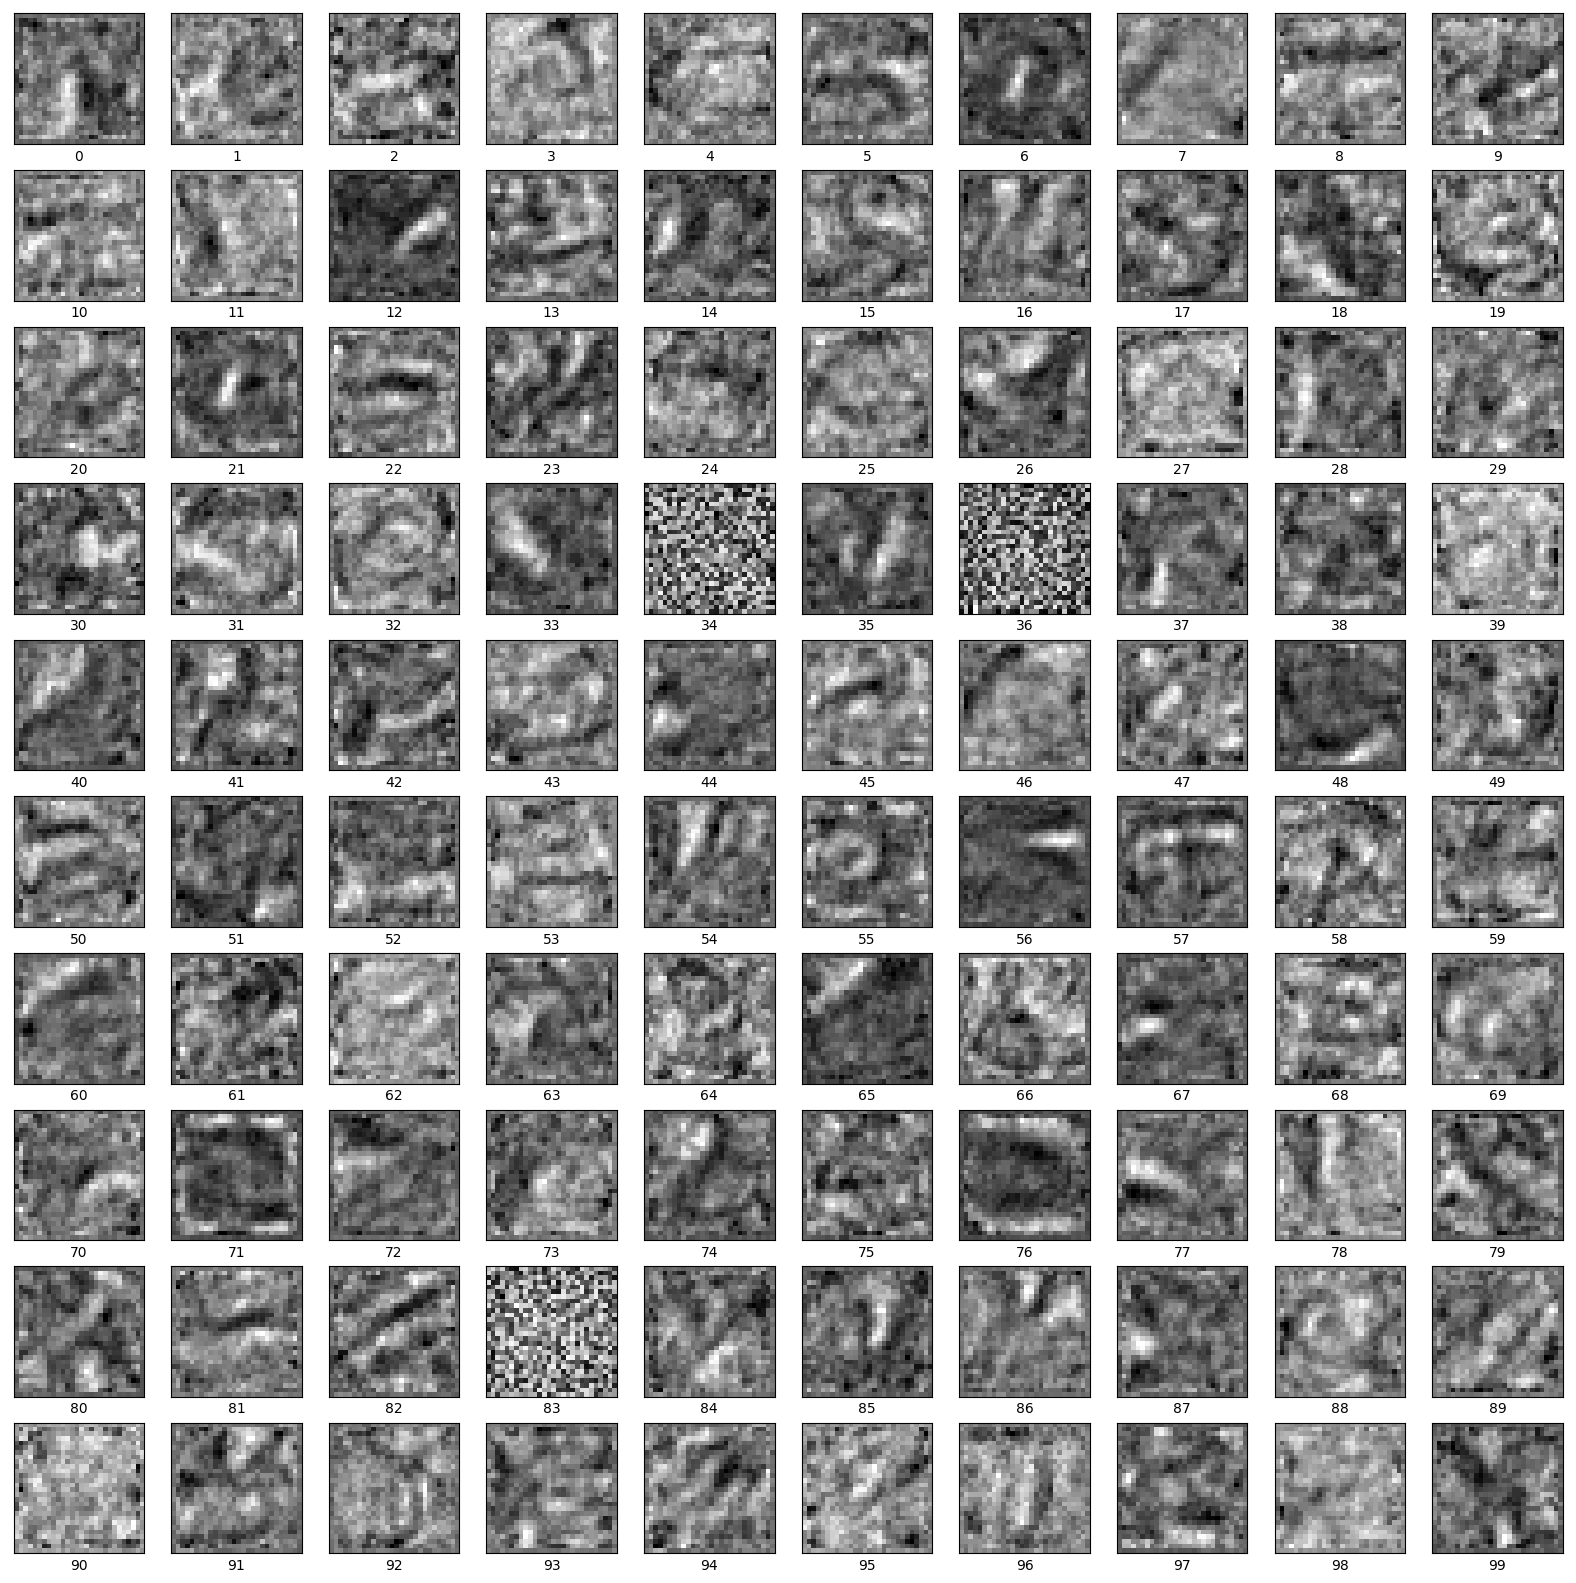

In [385]:
plt.figure(figsize=(20, 20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(linear_model.get_layer(index=1).get_weights()[0][:, i].reshape((28, 28)), cmap='gray_r')
    plt.xlabel(i)
    plt.grid(False)

plt.show()

Добавим сверточные слои и посмотрим на результат

In [581]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D

In [434]:
model = Sequential()
model.add(Conv2D(200, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(100, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
# model.add(Dense(300))
# # model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(27))
model.add(Activation(tf.nn.softmax))

In [435]:
model.compile(optimizer=tf.train.AdamOptimizer(),
                       loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [436]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
65000/65000 [==============================] - 351s 5ms/step - loss: 0.5113 - acc: 0.8432
Epoch 2/10
65000/65000 [==============================] - 314s 5ms/step - loss: 0.2744 - acc: 0.9117
Epoch 3/10
65000/65000 [==============================] - 305s 5ms/step - loss: 0.2157 - acc: 0.9274
Epoch 4/10
65000/65000 [==============================] - 306s 5ms/step - loss: 0.1816 - acc: 0.9382
Epoch 5/10
65000/65000 [==============================] - 304s 5ms/step - loss: 0.1539 - acc: 0.9455
Epoch 6/10
65000/65000 [==============================] - 314s 5ms/step - loss: 0.1331 - acc: 0.9515
Epoch 7/10
65000/65000 [==============================] - 312s 5ms/step - loss: 0.1144 - acc: 0.9580
Epoch 8/10
65000/65000 [==============================] - 327s 5ms/step - loss: 0.1044 - acc: 0.9600
Epoch 9/10
65000/65000 [==============================] - 324s 5ms/step - loss: 0.0930 - acc: 0.9639
Epoch 10/10
65000/65000 [==============================] - 312s 5ms/step - loss: 0.0845 - a

In [441]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

13000/13000 [==============================] - 22s 2ms/step
Test accuracy: 0.9235384615384615 
Test loss: 0.2996137542180144


Уже получили довольно неплохой результат и переобучением не пахнет особо, но на 20-30 эпохах можно было получить гораздо большую точность, к сожалению не хватило времени

### Задание 2

#### 1

In [463]:
def plot_confusion_matri(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(20, 16))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [464]:
train_images = train_images.reshape(65000,28,28)
test_images = test_images.reshape(13000, 28, 28)

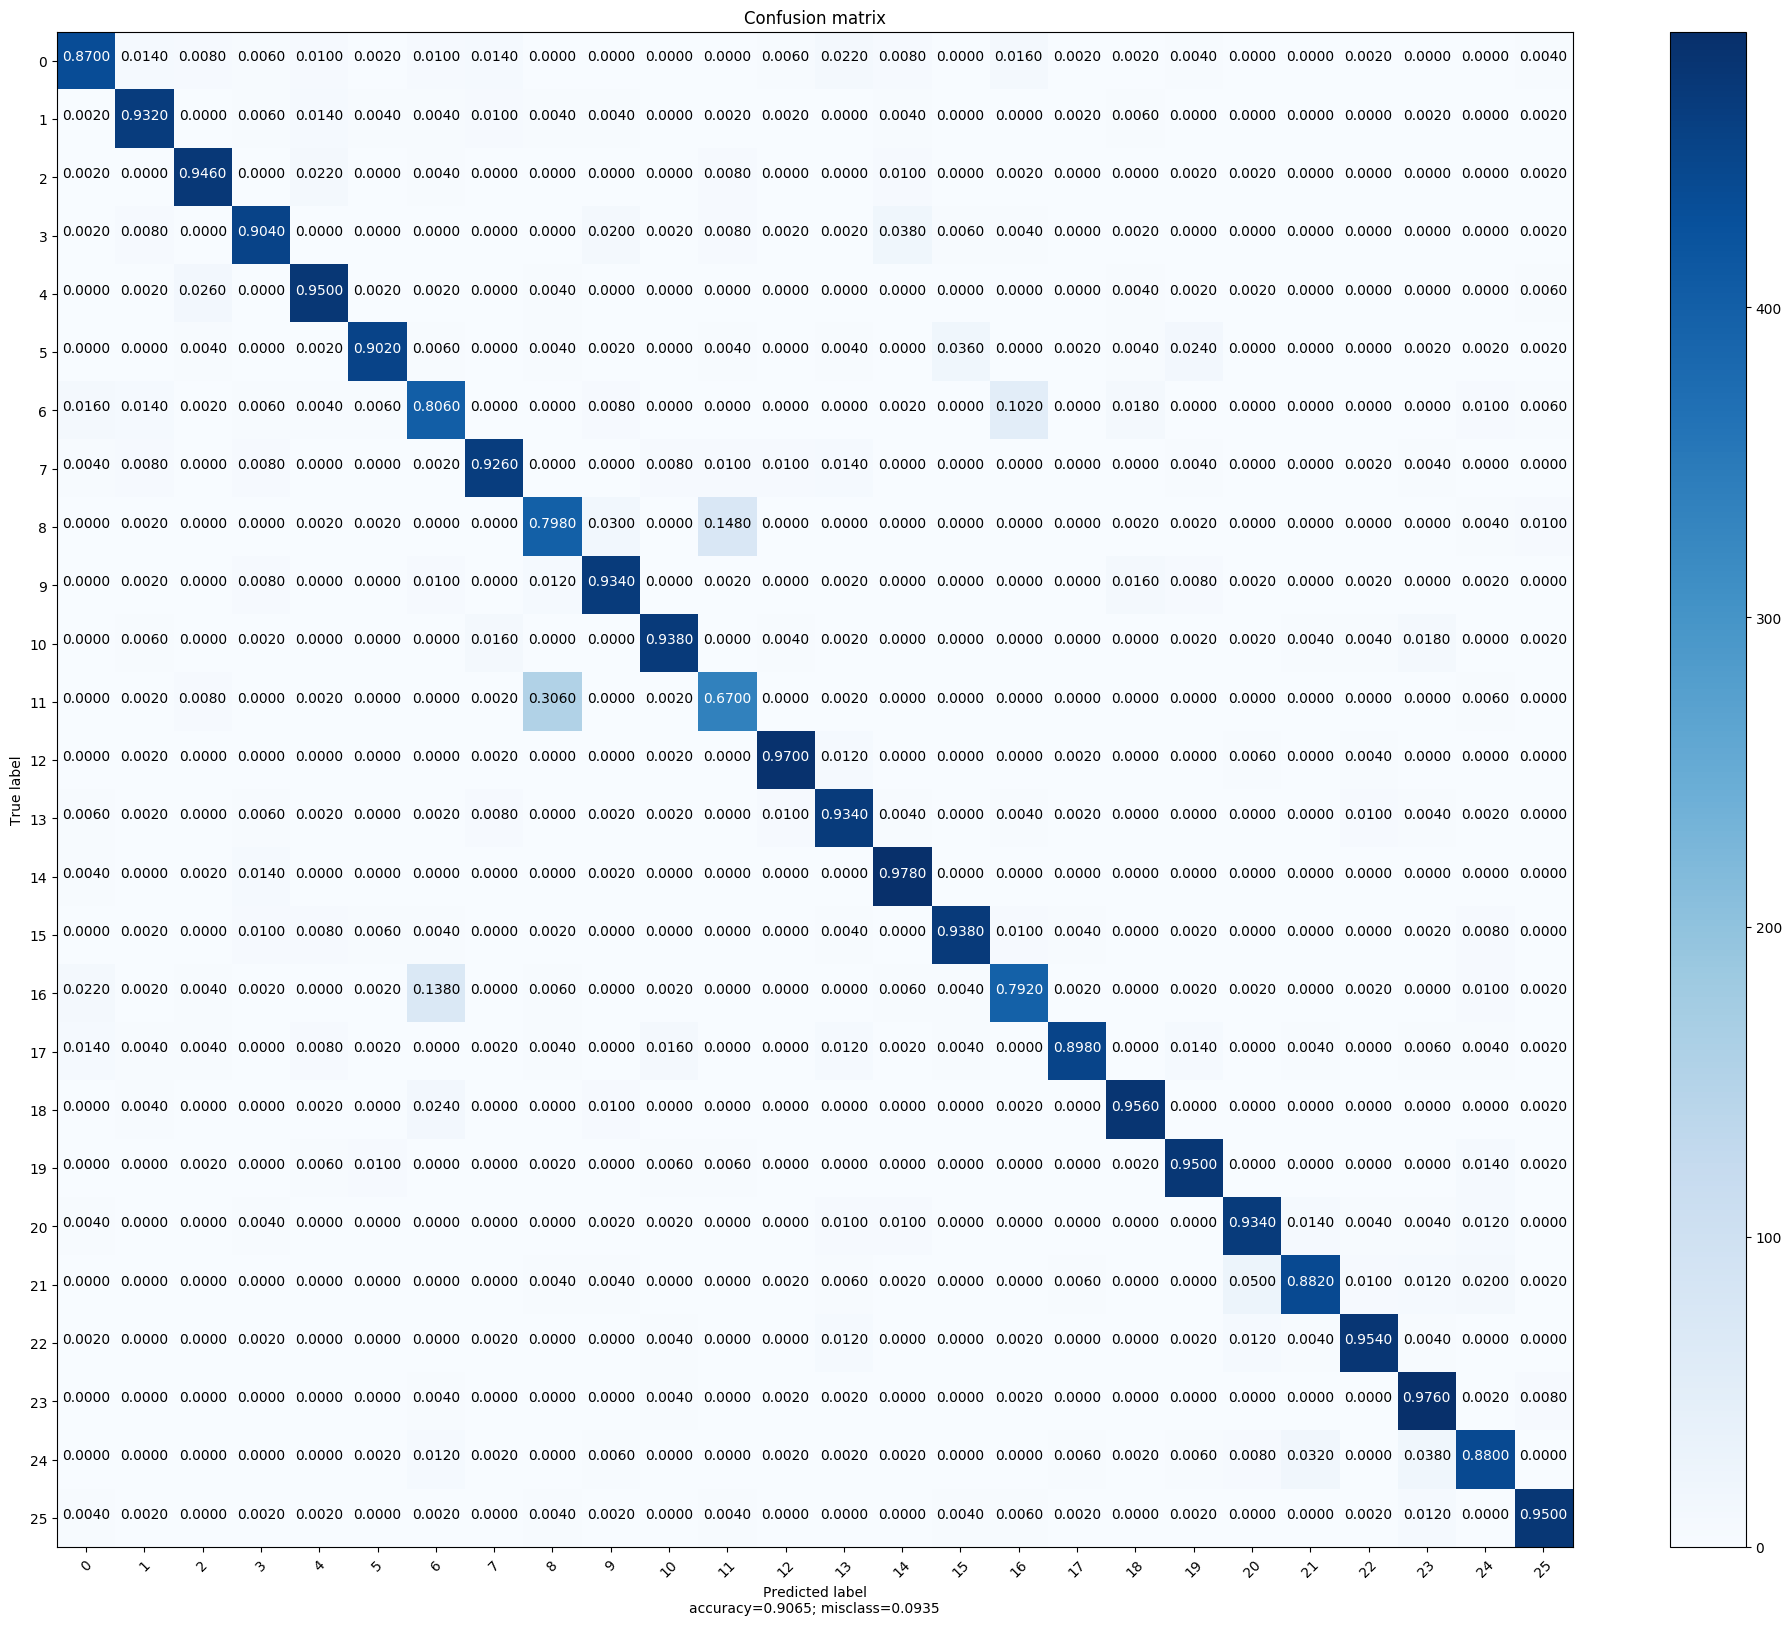

In [465]:
style.use('default')
plot_confusion_matri(cm=metrics.confusion_matrix(test_labels, linear_model.predict_classes(test_images)),
                      target_names=np.arange(0, 26),
                      normalize=True)

In [504]:
train_images = train_images.reshape(65000,28,28)
test_images = test_images.reshape(13000, 28, 28)

In [567]:
characters = ['a', 'b', 'c', 'd', 'e', 'f', 
             'g', 'h', 'i', 'j', 'k', 'l', 
              'm', 'n', 'o', 'p', 'q', 'r', 
              's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
def numberToChar(a):
    return(characters[a-1])

In [574]:
numberToChar(0)

'z'

Посмотрим какие буквы неправильно обучались и выведем их пары

In [575]:
predicted_labels = model.predict_classes(test_images.reshape(13000,28,28,1))

In [576]:
test_labels_series = pd.Series(test_labels)

In [577]:
for ind, val in test_labels_series.items():
    if val != predicted_labels[ind]:
        print('Letter index: {0}, True value: {1}, Predicted value: {2}'.format(ind, val, predicted_labels[ind]))

Letter index: 7, True value: 7, Predicted value: 2
Letter index: 11, True value: 23, Predicted value: 11
Letter index: 20, True value: 17, Predicted value: 7
Letter index: 48, True value: 9, Predicted value: 12
Letter index: 52, True value: 17, Predicted value: 7
Letter index: 86, True value: 12, Predicted value: 9
Letter index: 88, True value: 14, Predicted value: 23
Letter index: 101, True value: 9, Predicted value: 12
Letter index: 156, True value: 9, Predicted value: 12
Letter index: 177, True value: 17, Predicted value: 1
Letter index: 194, True value: 17, Predicted value: 7
Letter index: 211, True value: 23, Predicted value: 14
Letter index: 231, True value: 8, Predicted value: 2
Letter index: 260, True value: 17, Predicted value: 7
Letter index: 274, True value: 12, Predicted value: 9
Letter index: 316, True value: 17, Predicted value: 1
Letter index: 318, True value: 4, Predicted value: 12
Letter index: 325, True value: 22, Predicted value: 21
Letter index: 334, True value: 17,

Теперь посмотрим равномерно ли обучилась модель

#### 2

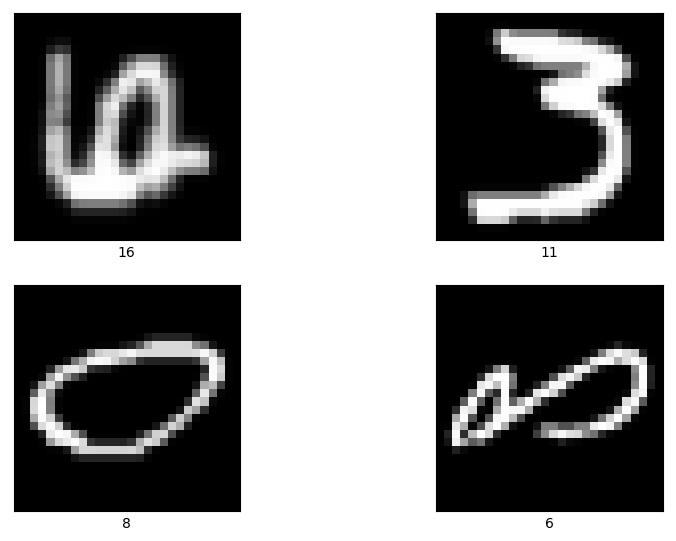

In [616]:
abc = [16,11,8,6]
s_ind = 1
plt.figure(figsize=(10,10))
for i in abc:
    index, = np.where(test_labels == i)
    plt.subplot(3,2,s_ind)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[index[4]].reshape((28,28)).T, cmap='gray')
    plt.xlabel(i)
    plt.grid(False)
    s_ind += 1
plt.show()

В целом модель обучалась плюс минус равномерно. Практически везде показатели одинаковые, кроме нескольких.Наша точность детекции равна примерно 0.93. Однако есть буквы, которые плохо распознаются. Хуже всех: 6(G),8(I),11(l),16(q). Это логично, потому что буква g и q очень похожи и их не всегда легко распознать даже печатные. Ну и с l и i аналогичная ситуация
Также не очень хорошо 17(r), 21(v),24(y). Все это мы видим на матрице ошибок. А так средняя ошибка получилась около 0.09. Также датасет ужасный и неточный)

#### 3.

Взглянем на матрицу ошибок и посмотрим с какими буквами чаще всего путалась первая буква фамилии - G

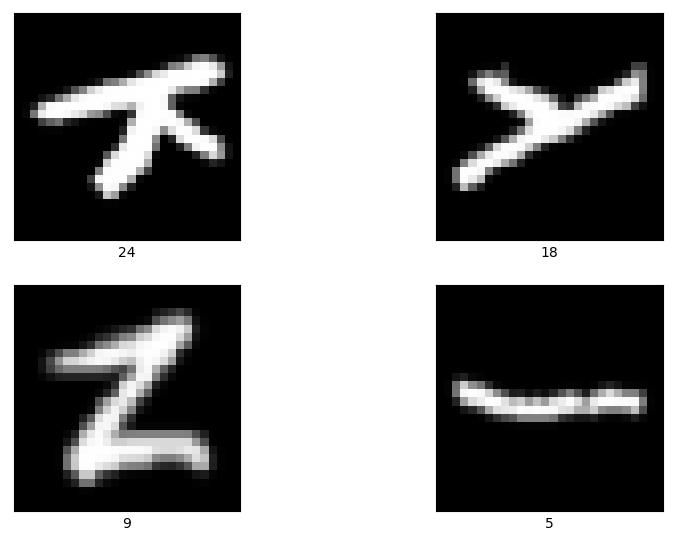

In [605]:
letters = [24,18,9,5]
s_ind = 1
plt.figure(figsize=(10,10))
for i in letters:
    index, = np.where(test_labels == i)
    plt.subplot(3,2,s_ind)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[index[1]].reshape((28,28)).T, cmap='gray')
    plt.xlabel(i)
    plt.grid(False)
    s_ind += 1
plt.show()

Точность детекции получилась 0.8060. Конкретно эта буква плохо распознается и это заметно, так как она очень схожа с буквой Y, J, F и Q. У них примерно одинаковые центры и из-за корявого почерко очень легко перепутать эту букву с другими, а особенно в нижнем регистре. А также из-за некорректности датасета